In [2]:
#This notebook uses Support Vector Classification to come up with a simple trading/investment strategy

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas_datareader as web

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [3]:
# Get the past year stock price
# today's date
today = pd.to_datetime('today').strftime('%Y-%m-%d')
# 1 year ago
start = pd.to_datetime('today') - pd.DateOffset(years=1)
df = web.DataReader('AAPL', data_source='yahoo', start=start, end=today)

In [8]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [9]:
# Create the independent variables
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']


In [10]:
# Store the independent variables in a new variable called 'X'
X = df[['High-Low', 'Open-Close', 'Close']]


In [11]:
# Store target variable in a new variable called 'y': if tomorrows close price is greater than todays close price, then y = 1, else y = 0
# 1 indicate to buy by today closing and sell by tomorrow closing and 0 indicates no action
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [12]:
len(y)

252

In [13]:
# Get the percentage to split the data into training (90%) and testing sets (10%)
split_percentage = 0.9
row = int(df.shape[0] * split_percentage)

# Cretate the training data set
X_train = X[:row]
y_train = y[:row]

# Create the testing data set
X_test = X[row:]
y_test = y[row:]

In [14]:
# import library for Support Vector Classification
from sklearn.svm import SVC

# Create model
model = SVC()

# Train the model
model.fit(X_train[['Open-Close','High-Low']], y_train)

SVC()

In [15]:
# Check the score of the model on the train dataset
model.score(X_train[['Open-Close','High-Low']], y_train)

0.5929203539823009

In [16]:
# Check the score of the model on the test dataset
model.score(X_test[['Open-Close','High-Low']], y_test)

0.5

In [17]:
# Make and show the model predictions
df['predictions'] = model.predict(X[['Open-Close','High-Low']])

# Show predictions
df['predictions']

Date
2021-09-15    1
2021-09-16    1
2021-09-17    0
2021-09-20    1
2021-09-21    1
             ..
2022-09-08    1
2022-09-09    1
2022-09-12    0
2022-09-13    0
2022-09-14    1
Name: predictions, Length: 252, dtype: int32

In [20]:
# Make a random decision
df['random'] = np.random.randint(0,2, len(df))

df['random']

Date
2021-09-15    0
2021-09-16    1
2021-09-17    1
2021-09-20    1
2021-09-21    1
             ..
2022-09-08    1
2022-09-09    0
2022-09-12    0
2022-09-13    1
2022-09-14    1
Name: random, Length: 252, dtype: int32

In [21]:
# Calculate the daily returns from the stock
df['returns'] = df['Close'].pct_change(1)
# Show the returns
df['returns']

Date
2021-09-15         NaN
2021-09-16   -0.001610
2021-09-17   -0.018348
2021-09-20   -0.021361
2021-09-21    0.003428
                ...   
2022-09-08   -0.009618
2022-09-09    0.018840
2022-09-12    0.038508
2022-09-13   -0.058680
2022-09-14    0.009555
Name: returns, Length: 252, dtype: float64

In [22]:
# Calculate the strategy returns
df['strategy_returns'] = df['predictions'].shift(1) * df['returns']
# Show the strategy returns
df['strategy_returns']

Date
2021-09-15         NaN
2021-09-16   -0.001610
2021-09-17   -0.018348
2021-09-20   -0.000000
2021-09-21    0.003428
                ...   
2022-09-08   -0.009618
2022-09-09    0.018840
2022-09-12    0.038508
2022-09-13   -0.000000
2022-09-14    0.000000
Name: strategy_returns, Length: 252, dtype: float64

In [26]:
# Calculate the cumulative strategy returns
df['Cumulate_Strategy'] = df['strategy_returns'].cumsum()

# Calculate the cumulative market returns
df['Cumulative Market'] = df['returns'].cumsum()

In [23]:
# Calcuate the random returns
df['random_returns'] = df['random'].shift(1) * df['returns']
# Show the random returns
df['random_returns']

Date
2021-09-15         NaN
2021-09-16   -0.000000
2021-09-17   -0.018348
2021-09-20   -0.021361
2021-09-21    0.003428
                ...   
2022-09-08   -0.000000
2022-09-09    0.018840
2022-09-12    0.000000
2022-09-13   -0.000000
2022-09-14    0.009555
Name: random_returns, Length: 252, dtype: float64

In [24]:
# Calculate the cumulative random returns
df['Cumulative Random'] = df['random_returns'].cumsum()


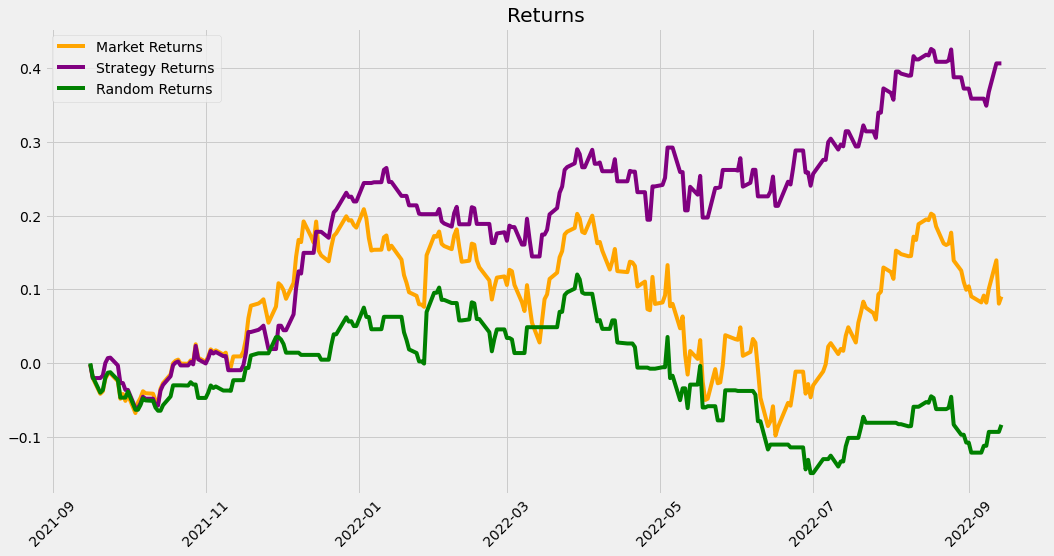

In [27]:
# Visualize and show the data
plt.figure(figsize=(16,8))
plt.title('Returns')
plt.plot(df['Cumulative Market'], color='orange', label='Market Returns')
plt.plot(df['Cumulate_Strategy'], color='purple', label='Strategy Returns')
plt.plot(df['Cumulative Random'], color='green', label='Random Returns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [17]:
# Print the returns
print('Market Returns: ', df['Cumulative Market'][-1]*100, '%')
print('Strategy Returns: ', df['Cumulate_Strategy'][-1]*100, '%')

Market Returns:  4.126221594990332 %
Strategy Returns:  35.107877197471524 %
